# 一般化線形モデル　ロジスティック回帰モデル
対象：Spector and Mazzeo (1980) - Program Effectiveness Data <br>
http://www.statsmodels.org/dev/datasets/generated/spector.html


In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#import seaborn as sns

np.random.seed(123)
FLAG_fig = False

In [2]:
data = sm.datasets.spector.load().data
df = pd.DataFrame(data)
print(df.head())

    GPA  TUCE  PSI  GRADE
0  2.66  20.0  0.0    0.0
1  2.89  22.0  0.0    0.0
2  3.28  24.0  0.0    0.0
3  2.92  12.0  0.0    0.0
4  4.00  21.0  0.0    1.0


/anaconda3/lib/python3.7/site-packages/statsmodels/datasets/utils.py:100: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exog = np.column_stack(data[field] for field in exog_name)


In [4]:
glm_model = 'GRADE ~GPA + TUCE + PSI '
fit = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial(link=sm.families.links.logit))
result = fit.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                            GLM   Df Residuals:                       28
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.890
Date:                Mon, 18 Nov 2019   Deviance:                       25.779
Time:                        09:22:32   Pearson chi2:                     27.3
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.0213      4.931     -2.641      0.008     -22.686      -3.356
GPA            2.8261      1.263      2.238      0.0

In [5]:
print(df.corr())

            GPA      TUCE       PSI     GRADE
GPA    1.000000  0.386986  0.039683  0.497147
TUCE   0.386986  1.000000  0.112780  0.303055
PSI    0.039683  0.112780  1.000000  0.422760
GRADE  0.497147  0.303055  0.422760  1.000000


念のため，縦軸にGRADEをとり，横軸にGPA,色でPSI=1,0を区別したグラフから何かを言えるかを確かめてみた。　
しかし，あまり，有意な特徴を見出すことはできない。

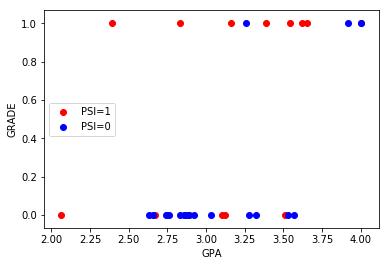

In [6]:
plt.scatter(df.GPA[df.PSI==1.0], df.GRADE[df.PSI == 1.0] ,c = "red", label = "PSI=1")
plt.scatter(df.GPA[df.PSI==0.0], df.GRADE[df.PSI == 0.0] ,c = "blue", label = "PSI=0")

plt.xlabel('GPA')
plt.ylabel('GRADE')
#plt.title('Red:PSI=1,  Blue:PSI=0')
plt.legend(loc='center left')

次に，GRADE=1,0でグループ分けして，GPAに関するボックスプロットを行った。  
これを見ても，あまり有意な特徴を見出すことはできない。

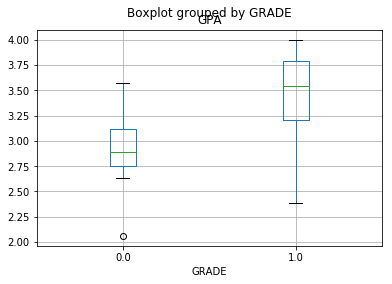

In [7]:
df.boxplot(column=['GPA'], by='GRADE') #byはグループ毎で見る列を指定　